In [1]:
import module

In [2]:
device = module.HP4155a('GPIB0::17::INSTR')
device.reset()
device.smu_mode_meas(1,"V")
device.smu_function_sweep(1,'VARD')
device.smu_mode_meas(2,"V")
device.smu_function_sweep(2,'CONS')
device.smu_mode_meas(3,"V")
device.smu_function_sweep(3,'VAR1')
device.smu_mode_meas(4,"COMM")
device.smu_function_sweep(4,'CONS')

In [4]:
device.disable_vsu(1)
device.disable_vsu(2)
device.disable_vmu(1)
device.disable_vmu(2)

In [5]:
device.start_value_sweep(-30)
device.stop_value_sweep(30)
device.step_sweep(1)
device.comp("VAR1",0.001)
device.inst.write(":PAGE:MEAS:VARD:RATIO 0.1666")

device.user_function("VTG",'V','V1')
device.user_function('ID','A','I2')

In [6]:
device.const_comp(2,1e-3)
device.cons_smu_value(2,1)

In [ ]:
while device.operation_completed()==False:
        pass

In [8]:
ID = device.return_data('ID')
VTG = device.return_data('VTG')

In [9]:
import matplotlib.pyplot as plt

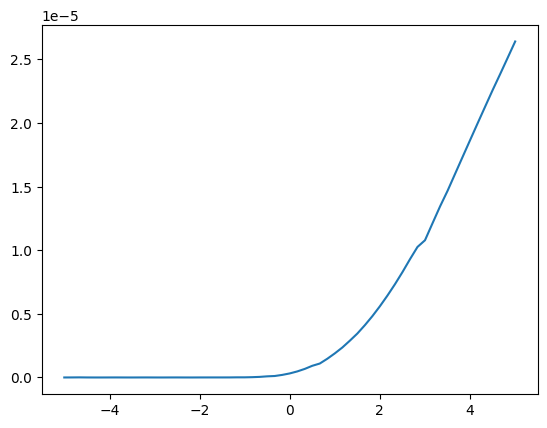

In [10]:
plt.plot(VTG,ID)

In [11]:
#output
device.reset()
device.smu_mode_meas(1,"V")
device.smu_function_sweep(1,'VAR2')
device.smu_mode_meas(2,"V")
device.smu_function_sweep(2,'VAR1')
device.smu_mode_meas(3,"V")
device.smu_function_sweep(3,'CONS')
device.smu_mode_meas(4,"COMM")
device.smu_function_sweep(4,'CONS')

In [12]:
device.start_value_sweep(0)
device.stop_value_sweep(4)
device.step_sweep(0.1)
device.comp("VAR1",0.1)

In [13]:
device.var2_start(1)
device.var2_step(1)
device.var2_points(5)
device.var2_comp(0.001)

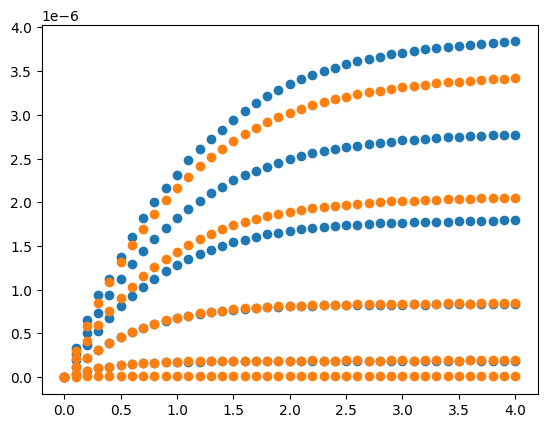

In [14]:
device.user_function('VDS','V','V2')
device.user_function('ID','A','I2')
for i in range(10,21,10):
    device.const_comp(2,0.001)
    device.cons_smu_value(2,i)
    device.single_measurement()
    while device.operation_completed()==False:
        pass
    VDS=device.return_data('VDS')
    ID = device.return_data('ID')
    plt.scatter(VDS,ID)
plt.show()